#### Problem Statement

To predict SepalLengthCm values from other independent variables in the IRIS dataset.

*Independent variables are >> SepalWidthCm,PetalLengthCM,PetalWidthCm and Species
*Dependent variable is SepalLengthCm

#### Importing required libraries

In [35]:
# basic libraries
import pandas as pd
import numpy as np

# linear regression model
from sklearn.linear_model import LinearRegression

# for training and testing data derivation
from sklearn.model_selection import train_test_split

# for model evaluation
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# for saving the model in a serialized file
import pickle

import warnings
warnings.filterwarnings('ignore')

#### 1. Data Gathering

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### 2. EDA

In [3]:
# cheking for null values
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

NO null values observed

In [4]:
# Univariate analysis

In [5]:
df["Id"].nunique(),df.shape # irrelevant feature 

(150, (150, 6))

In [6]:
df["Species"].unique() 

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<Axes: xlabel='SepalWidthCm', ylabel='Density'>

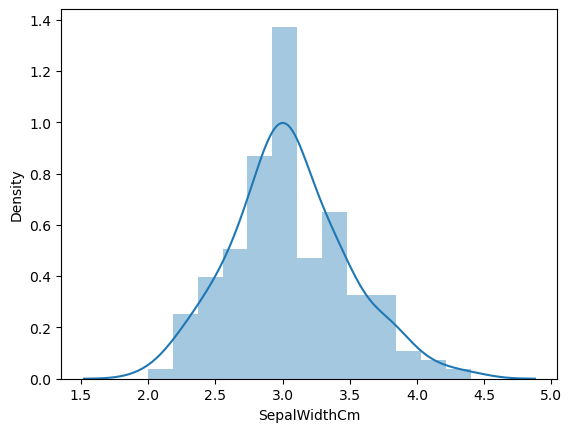

In [7]:
sns.distplot(df['SepalWidthCm'],kde=True)

<Axes: xlabel='PetalWidthCm', ylabel='Density'>

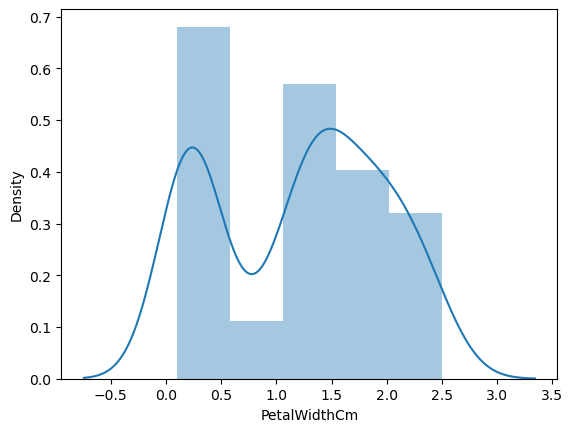

In [8]:
sns.distplot(df['PetalWidthCm'],kde=True)

<Axes: xlabel='PetalLengthCm', ylabel='Density'>

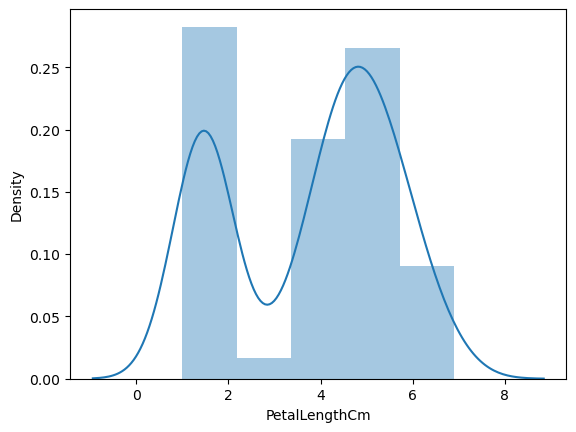

In [9]:
sns.distplot(df['PetalLengthCm'],kde=True)

We can observe that the numerical features are fairly normally distributed with no signs of outliers

#### 3. Feature Engineering

In [10]:
df.drop("Id",axis=1,inplace=True)

In [11]:
df.shape

(150, 5)

In [12]:
df["Species"].value_counts().to_dict()

{'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50}

In [13]:
df["Species"].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2},inplace = True)

In [14]:
df["Species"].value_counts().to_dict()

{0: 50, 1: 50, 2: 50}

##### 5. Feature Selection

In [15]:
# checking Pearson coefficient of correlation between independent and dependent variables
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [16]:
# using spearman correlation
df.corr(method='spearman')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.159457,0.881386,0.834421,0.798078
SepalWidthCm,-0.159457,1.000000,-0.303421,-0.277511,-0.434348
PetalLengthCm,0.881386,-0.303421,1.000000,0.936003,0.935441
PetalWidthCm,0.834421,-0.277511,0.936003,1.000000,0.937850
Species,0.798078,-0.434348,0.935441,0.937850,1.000000


Observation: All the dependent variables lie within a good range of correlation with the target variable

<Axes: >

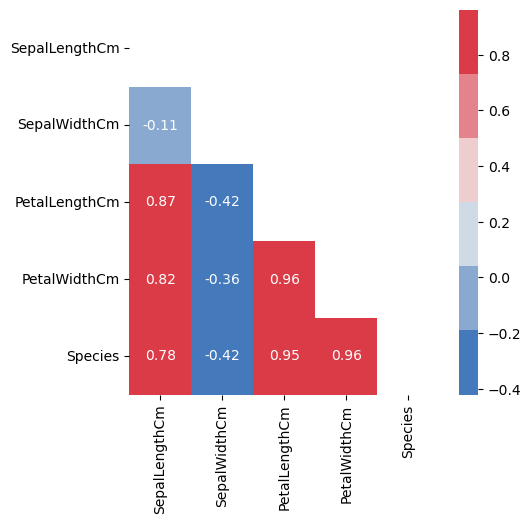

In [17]:
plt.figure(figsize=(5,5))
cmap=sns.diverging_palette(250,10,as_cmap=False)
mask=np.triu(np.ones_like(df.corr(),dtype=bool))
sns.heatmap(df.corr(),annot=True,cmap=cmap,mask=mask)
# plt.savefig("Correlation.png")

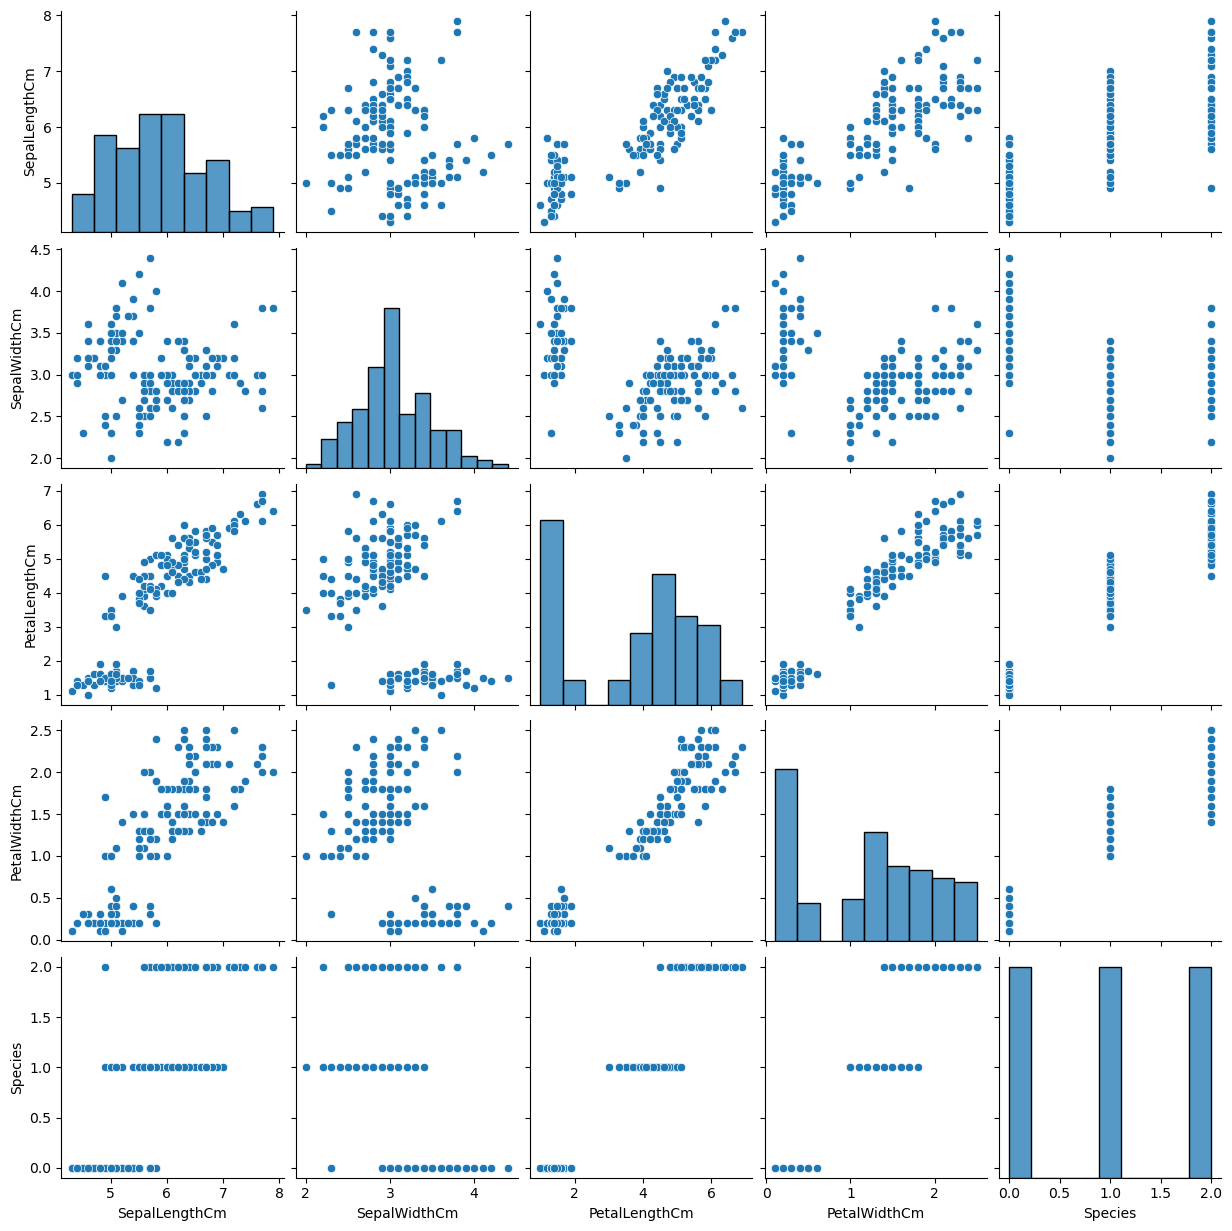

In [18]:
sns.pairplot(df)

<Axes: xlabel='PetalLengthCm', ylabel='SepalLengthCm'>

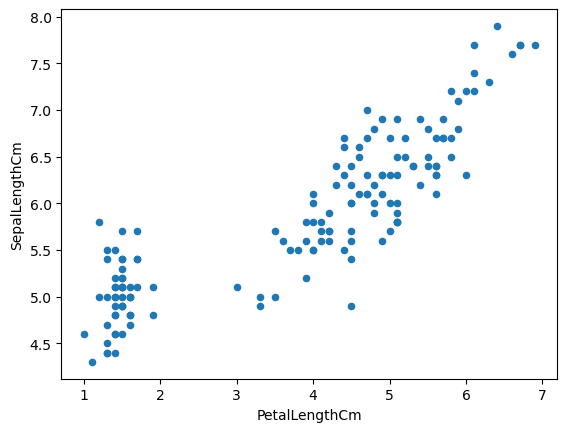

In [19]:
df.plot(x = "PetalLengthCm", y = "SepalLengthCm", kind= "scatter")

##### 6) Model Training and Selection

In [20]:
x = df.drop("SepalLengthCm",axis=1)
y = df["SepalLengthCm"]

##### 6.1 Train test split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=40)

In [30]:
x_train.shape,x_test.shape

((120, 4), (30, 4))

#### 6.2 Model Training

In [23]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

##### 7. Evaluation

In [33]:
# On Testing data
y_pred=lr_model.predict(x_test)

# mean squared error
mse=mean_squared_error(y_test,y_pred)
print('MSE\n',mse)

# mean absolute error
mae=mean_absolute_error(y_test,y_pred)
print('MAE\n',mae)

#r-squared score
r2score=r2_score(y_test,y_pred)
print("R2 Score\n",r2score)

# Adjusted r2 score
adj_r2=1-((1-r2score)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted r2 square\n",adj_r2)

MSE
 0.10606497486114531
MAE
 0.2541957737288113
R2 Score
 0.8411170297181625
Adjusted r2 square
 0.8156957544730685


In [34]:
# On Training data
y_pred=lr_model.predict(x_train)

# mean squared error
mse=mean_squared_error(y_train,y_pred)
print('MSE\n',mse)

# mean absolute error
mae=mean_absolute_error(y_train,y_pred)
print('MAE\n',mae)

#r-squared score
r2score=r2_score(y_train,y_pred)
print("R2 Score\n",r2score)

# Adjusted r2 score
adj_r2=1-((1-r2score)*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print("Adjusted r2 square\n",adj_r2)

MSE
 0.09134319036114152
MAE
 0.2461987900107684
R2 Score
 0.8664893136796701
Adjusted r2 square
 0.861845463720702


Observation- Model is performing with a fairly good accuracy on both the training and testing data. Issue of overfitting is not being observed

##### 8. Saving the model

In [36]:
with open('iris_linear_reg.pkl','wb') as file:
    pickle.dump(lr_model,file)

#### - Function to predict Single User Input 

In [ ]:
def predict_sepalLengthCm(SepalWidthCm,PetalLengthCm,PetalWidthCm,Species):
    df_test = pd.DataFrame({"SepalWidthCm":[SepalWidthCm],
                            "PetalLengthCm":[PetalLengthCm],
                            "PetalWidthCm" : [PetalWidthCm],
                            "Species" : [Species]})
    ypred_new = lr_model.predict(df_test)
    
    sepal_lengthCM = np.around(ypred_new,1)[0]
    return sepal_lengthCM

In [ ]:
predict_sepalLengthCm(3,4.5,1.5,1)